In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def pandemic(k,t):
    
    S_H = k[0]
    S_M = k[1]
    S_L = k[2]
    I_H = k[3]
    I_M = k[4]
    I_L = k[5]  
    
    dS_Hdt = -ps['beta_H'] * (I_H + ps['alpha'] * I_M + ps['alpha'] * I_L) * S_H +  ps['eta_MH'] * S_M
    dS_Mdt = -ps['beta_M'] * (ps['alpha'] * I_H + I_M + ps['alpha'] * I_L) * S_M - (ps['eta_MH'] + ps['eta_ML']) * S_M
    dS_Ldt = -ps['beta_L'] * (ps['alpha'] * I_H + ps['alpha'] * I_M + I_L) * S_L +  ps['eta_ML'] * S_M
    
    dI_Hdt =  ps['beta_H'] * (I_H + ps['alpha'] * I_M + ps['alpha'] * I_L) * S_H - ps['gamma_H'] * I_H 
    dI_Mdt =  ps['beta_M'] * (ps['alpha'] * I_H + I_M + ps['alpha'] * I_L) * S_M - ps['gamma_M'] * I_M 
    dI_Ldt =  ps['beta_L'] * (ps['alpha'] * I_H + ps['alpha'] * I_M + I_L) * S_L - ps['gamma_L'] * I_L 
    
    return [dS_Hdt, dS_Mdt, dS_Ldt, dI_Hdt, dI_Mdt, dI_Ldt]

In [3]:
#t range and time step
stp = 0.1
t = np.arange(0,80, stp)

In [4]:
#groups
S_colors = ['r-','y-','b-']
I_colors = ['r--','y--','b--']
groups = ['high risk', 'medium risk', 'low risk']

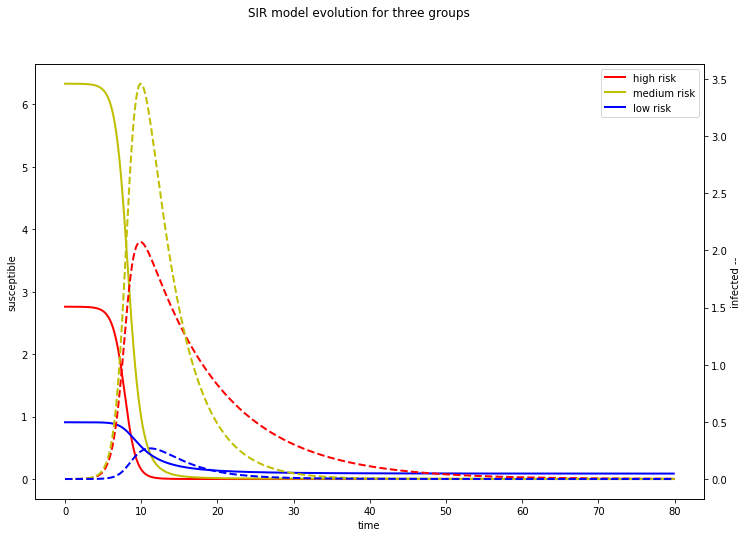

In [7]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 

e = 0.0
b = 0.3
center = 0.4
pop_tot = 3.4 + 7.8 + 1.12
k0 = [34/pop_tot, 78/pop_tot, 11.2/pop_tot, 0.0001, 0.0001, 0.0001]               #[high, med, low]         
ps = {'beta_H'  : b ,  'beta_M' : 41/73 * b ,'beta_L' : 19/73 * b,       #Infection rate
      'gamma_H' : center - b, 'gamma_M' : center - 41/73 * b,'gamma_L' : center - 19/73 * b, # death and recovery rate
      'alpha'   : 0.5,                                            #isolation parameter
      'eta_MH'  : e, 'eta_ML' : e}                                #interchage rate

#Solving initial conditions
#t = np.arange(0,50, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()

In the following code, we want to plot the INFECTION PEAK and the respective TIME (at which the peak occurs), versus alpha. 

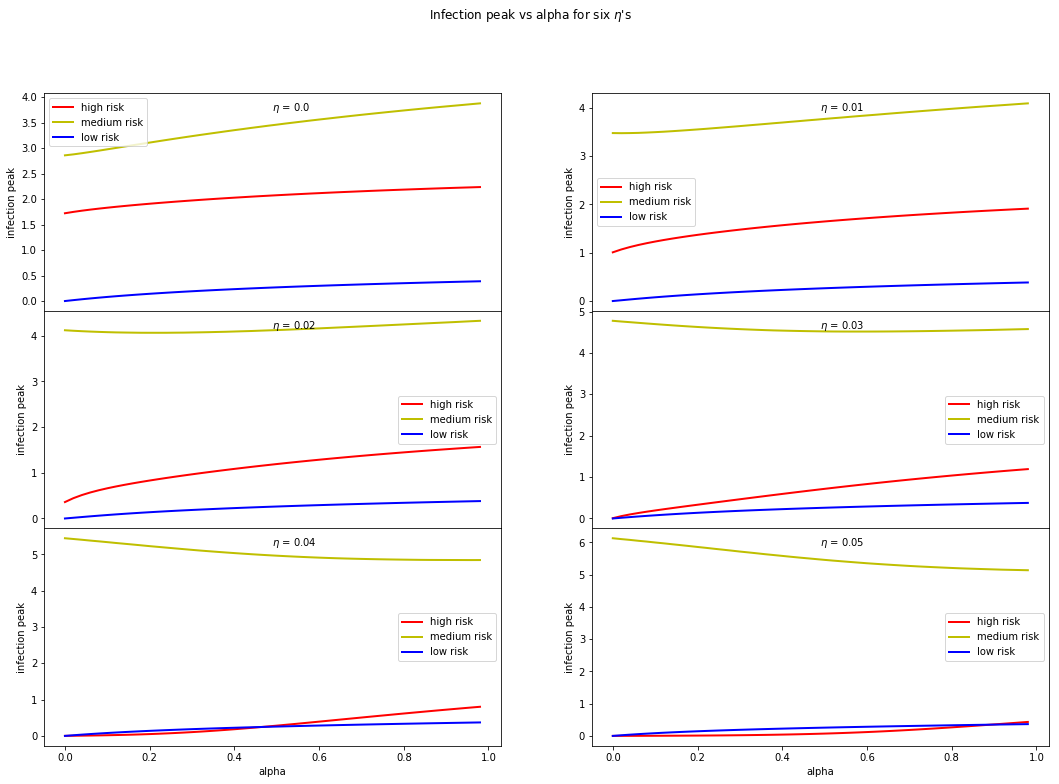

In [10]:
#fig configuration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (18,12))
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6)]
fig.suptitle('Infection peak vs alpha for six $\eta$\'s')

alphas = np.arange(0,1,0.02)
etas = [[0.00, 0.01], [0.02, 0.03], [0.04, 0.05]]
t = np.arange(0,50, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(alphas),3))
t_max_array = np.zeros((len(alphas),3))
fig.subplots_adjust(hspace=0)

for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(2):
        ax = axs[ax_ind1][ax_ind2]
        e = etas[ax_ind1][ax_ind2]
        ps['eta_MH'] = -e
        ps['eta_ML'] = 0
        i = 0
        for a in alphas: #we want to solve the equation for various values of alpha
            ps['alpha'] = a
            #Solving initial conditions
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:]
            I_max_array[i] = np.max(I[:,:], axis = 0)
            t_max_array[i] = time_array[I[:,:] == I_max_array[i]]
            i += 1

        #plotting
        for j in range(3): #plotting for 3 different groups. ax[0] is for I_peak (left) and ax[1] is for t_peak (right)
            ax.plot(alphas[:],I_max_array[:,j], S_colors[j], linewidth=2.0, alpha = 1, label = groups[j])
           
        ax.set_xlabel('alpha')
        ax.set_ylabel('infection peak')
        ax.text(0.5, 0.9,'$\eta$ = {}'.format(e) , fontsize=10, va='bottom', transform=ax.transAxes)
        ax.legend()


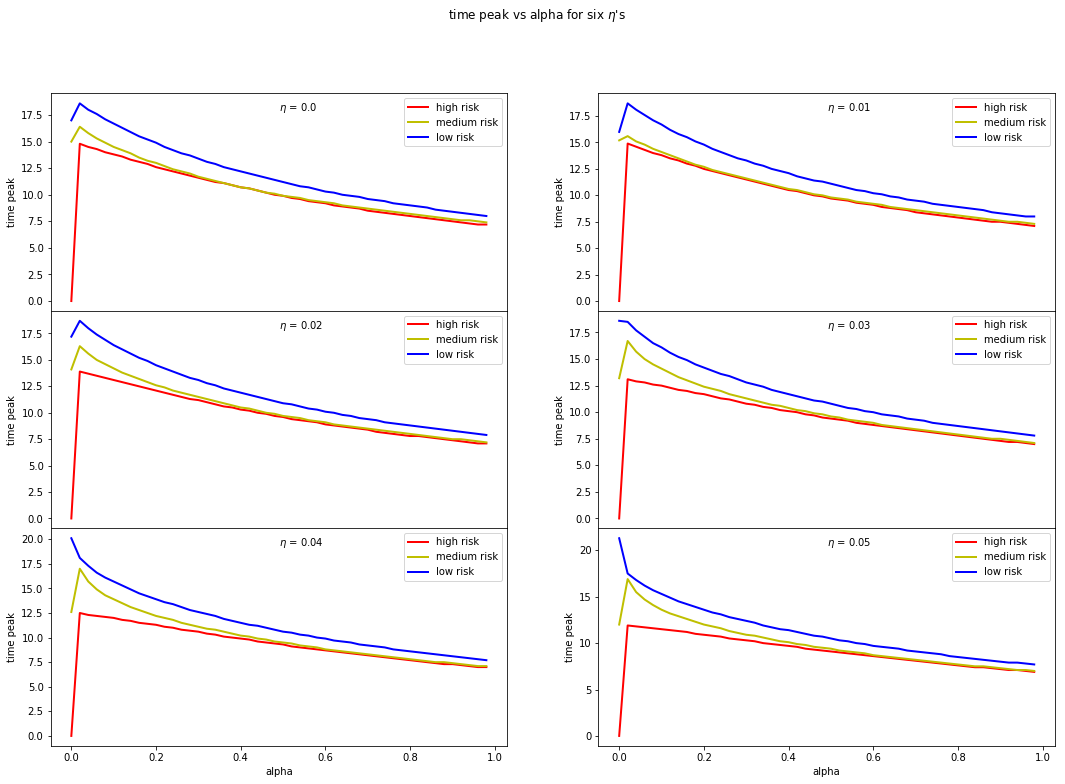

In [9]:
#fig configuration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (18,12))
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6)]
fig.suptitle('time peak vs alpha for six $\eta$\'s')

alphas = np.arange(0,1,0.02)
etas = [[0.00, 0.01], [0.02, 0.03], [0.04, 0.05]]
t = np.arange(0,50, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(alphas),3))
t_max_array = np.zeros((len(alphas),3))
fig.subplots_adjust(hspace=0)

for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(2):
        ax = axs[ax_ind1][ax_ind2]
        e = etas[ax_ind1][ax_ind2]
        ps['eta_MH'] = e
        ps['eta_ML'] = 0
        i = 0
        for a in alphas: #we want to solve the equation for various values of alpha
            ps['alpha'] = a
            #Solving initial conditions
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:]
            I_max_array[i] = np.max(I[:,:], axis = 0)
            t_max_array[i] = time_array[I[:,:] == I_max_array[i]]
            i += 1

        #plotting
        for j in range(3): #plotting for 3 different groups. ax[0] is for I_peak (left) and ax[1] is for t_peak (right)
            ax.plot(alphas[:],t_max_array[:,j], S_colors[j] ,linewidth=2.0, alpha = 1, label = groups[j])

        ax.set_xlabel('alpha')
        ax.set_ylabel('time peak')
        ax.text(0.5, 0.9,'$\eta$ = {}'.format(e) , fontsize=10, va='bottom', transform=ax.transAxes)
        ax.legend()


The following cell is very similar to the previous cell. I only plotted the FINAL S (instead of I_peak) versus alpha for 3 different eta's. Obviously t_final is meaningless and therefore we only have 3 ax's (instead of six)

In [ ]:
#fig configuration
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (12,12))
axs = [ax1, ax2, ax3]

fig.suptitle('S fixed points vs alpha for three $\eta$\'s')

alphas = np.arange(0,1,0.02)
etas = [0.01, 0.02, 0.03]
t = np.arange(0,50, stp)
S_final_array = np.zeros((len(alphas),3))
time_array = np.array([t,t,t]).T

fig.subplots_adjust(hspace=0)
ax_ind = 0
for ax in axs:
    e = etas[ax_ind]
    ps['eta_MH'] = e
    ps['eta_ML'] = 0
    i = 0
    for a in alphas:
        #initial conditions 
        #k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]
        ps['alpha'] = a
        #Solving initial conditions
        k = odeint(pandemic,k0,t)
        S = k[:,:3]
        I = k[:,3:]
        S_final_array[i] = S[-1,:]
    #plotting
    for j in range(3): #plotting for 3 groups
        ax.plot(alphas[:],S_final_array[:,j], S_colors[j], linewidth=2.0, alpha = 1, label = groups[j])
        ax.text(0.5, 0.9,'$\eta$ = {}'.format(e) , fontsize=10, va='bottom', transform=ax.transAxes)
        ax.set_ylabel('final S')
        ax.set_xlabel('alpha')
    ax.legend()
    ax_ind += 1
